# calling functions:

In [1]:
from flask import Flask
from flask_cors import CORS
from flask import jsonify
from flask import render_template
from flask import request
import pandas as pd
import numpy as np
import mysql.connector as connection
!pip install mysql-connector-python

# create table:Post

In [ ]:
app = Flask(__name__)
@app.route('/via_database/sql_create_table', methods=['POST'])
def Database():
    try:
        if(request.method== 'POST'):       
            table_name= (request.json['table_name'])
            product_idx= (request.json['product_idx'])
            product_name= (request.json['product_name'])
            price= (request.json['price'])
            quantity= (request.json['quantity'])


            mydb=connection.connect(host='localhost',user='root',passwd='root',use_pure=True,database='Shop3')
            cursor=mydb.cursor()
            cursor.execute(f"create table {table_name} ({product_idx} int(30),{product_name} varchar(30),{price} float(30),{quantity} int(10))")
        return jsonify(f"query_executed:Table {table_name} created")
        
        
    except Exception as e:
        print(str(e))    
        
if __name__ == '__main__':
    app.run()

# Drop table:Post

In [ ]:
app = Flask(__name__)
@app.route('/via_database/sql_drop', methods=['POST'])
def table_drop():
    try:
        if(request.method== 'POST'):        
            table_name= (request.json['table_name'])
            
            mydb=connection.connect(host='localhost',user='root',passwd='root',use_pure=True,database='Shop3')
            cursor=mydb.cursor()
            cursor.execute(f"drop table {table_name}")
        
        return jsonify(f"query_executed:Table {table_name} deleted")

    except Exception as e:
        print(str(e))

if __name__ == '__main__':
    app.run()


# Insert table:Post

In [ ]:
#fine
app = Flask(__name__)
@app.route('/via_database/sql_insert', methods=['POST'])
def Database():
    try:
        if(request.method== 'POST'):
            
            table= (request.json['table'])
            num_idx= (request.json['num_idx'])
            item= (request.json['item'])
            price= (request.json['price'])
            quantity=(request.json['quantity'])
            
            
            mydb=connection.connect(host='localhost',user='root',passwd='root',use_pure=True,database='Shop3')
            cursor=mydb.cursor()
            cursor.execute(f"insert into {table} values({num_idx},'{item}',{price},{quantity})")   
            mydb.commit()
        return jsonify(f"query_executed:value inserted")
    except Exception as e:
        print(str(e))

if __name__ == '__main__':
    app.run()

# select table:Post

In [3]:
app = Flask(__name__)
@app.route('/via_database/sql_select', methods=['POST'])
def table_select():
    try:
        if(request.method== 'POST'):
            table= (request.json['value2'])
            #command:
            mydb=connection.connect(host='localhost',user='root',passwd='root',use_pure=True,database='Shop3')
            cursor=mydb.cursor()
            cursor.execute(f"select * from {table}")
            fetch=cursor.fetchall()
            f=open("databse_record.txt","w+")            
            f.write(str(fetch)) 
            f.close()
        return jsonify(f"query_executed: databse records loaded")

    except Exception as e:
        print(str(e))
        
        


if __name__ == '__main__':
    app.run()

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000 (Press CTRL+C to quit)
127.0.0.1 - - [30/Jun/2022 13:06:32] "POST /via_database/sql_select HTTP/1.1" 200 -


# update table:Post

In [ ]:
app = Flask(__name__)
@app.route('/via_database/sql_update', methods=['POST'])
def table_update():
    try:
        if(request.method== 'POST'):            
            table_name= (request.json['table_name'])
            indx1= (request.json['indx1'])
            value1= (request.json['value1'])
            indx2= (request.json['indx2'])
            value2= (request.json['value2'])
                   
            mydb=connection.connect(host='localhost',user='root',passwd='root',use_pure=True,database='Shop3')
            cursor=mydb.cursor()
            cursor.execute(f"UPDATE {table_name} SET {indx1} = '{value1}' WHERE {indx2} = {value2}")
            mydb.commit()
        return jsonify(f"query_executed:Table value updated ")

    except Exception as e:
        print(str(e))
        
if __name__ == '__main__':
    app.run()


# logging test:

In [9]:
app = Flask(__name__)
@app.route('/via_database/sql_select', methods=['POST'])
def table_select():
    try:
        if(request.method== 'POST'):
            table= (request.json['value2'])
            #command:
            mydb=connection.connect(host='localhost',user='root',passwd='root',use_pure=True,database='Shop3')
            cursor=mydb.cursor()
            cursor.execute(f"select * from {table}")
            fetch=cursor.fetchall()
            
            f=open("databse_record.json","w+")            
            f.write(str(fetch))
            log_file(str(fetch))
            f.close()
        return jsonify(f"query_executed: databse records loaded")

    except Exception as e:
        log_file(str(e))


def log_file(infomation):   # logging the data:  
    try:          
        import logging
        logging.basicConfig(filename= 'logger.log',level=logging.DEBUG,format='%(name)s - %(asctime)s - %(message)s - %(levelname)s')
        
        #Create Handler :
        console_log=logging.StreamHandler()
        console_log.setLevel(logging.DEBUG)
        
        # log setting format:
        format=logging.Formatter('%(name)s , %(asctime)s , %(message)s ,%(levelname)s')
        console_log.setFormatter(format)
        logging.getLogger('').addHandler(console_log)
        #information:
        logging.info("Execution Ok")
        logger1=logging.getLogger('engine_nova')
        logger1.info(infomation)

    except Exception as e:
        print("error handeled",e)

if __name__ == '__main__':
    app.run()

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000 (Press CTRL+C to quit)
werkzeug , 2022-06-30 13:15:30,780 ,  * Running on http://127.0.0.1:5000 (Press CTRL+C to quit) ,INFO
mysql.connector.connection , 2022-06-30 13:15:37,979 , # _do_auth(): user: root ,DEBUG
mysql.connector.connection , 2022-06-30 13:15:37,981 , # _do_auth(): self._auth_plugin:  ,DEBUG
mysql.connector.connection , 2022-06-30 13:15:37,982 , # _do_auth(): user: root ,DEBUG
mysql.connector.connection , 2022-06-30 13:15:37,983 , # _do_auth(): password: root ,DEBUG
mysql.connector.connection , 2022-06-30 13:15:37,984 , new_auth_plugin: caching_sha2_password ,DEBUG
root , 2022-06-30 13:15:37,987 , Execution:Error ,INFO
root , 2022-06-30 13:15:37,987 , Execution:Error ,INFO
engine_nova , 2022-06-30 13:15:37,989 , [(1, 'Banana', 40.0, 12), (1, 'mango ', 40.0, 12), (1, 'mango ', 40.0, 12), (1, 'mango ', 40.0, 12), (1, 'mango ', 40.0, 12), (1, 'mango ', 40.0, 12), (1, 'GRAPES ', 40.0, 12), (1, 'BANANA ', 40.0, 12)] ,INFO
engine_nova , 2022

#### logging test successful

downloaded data:
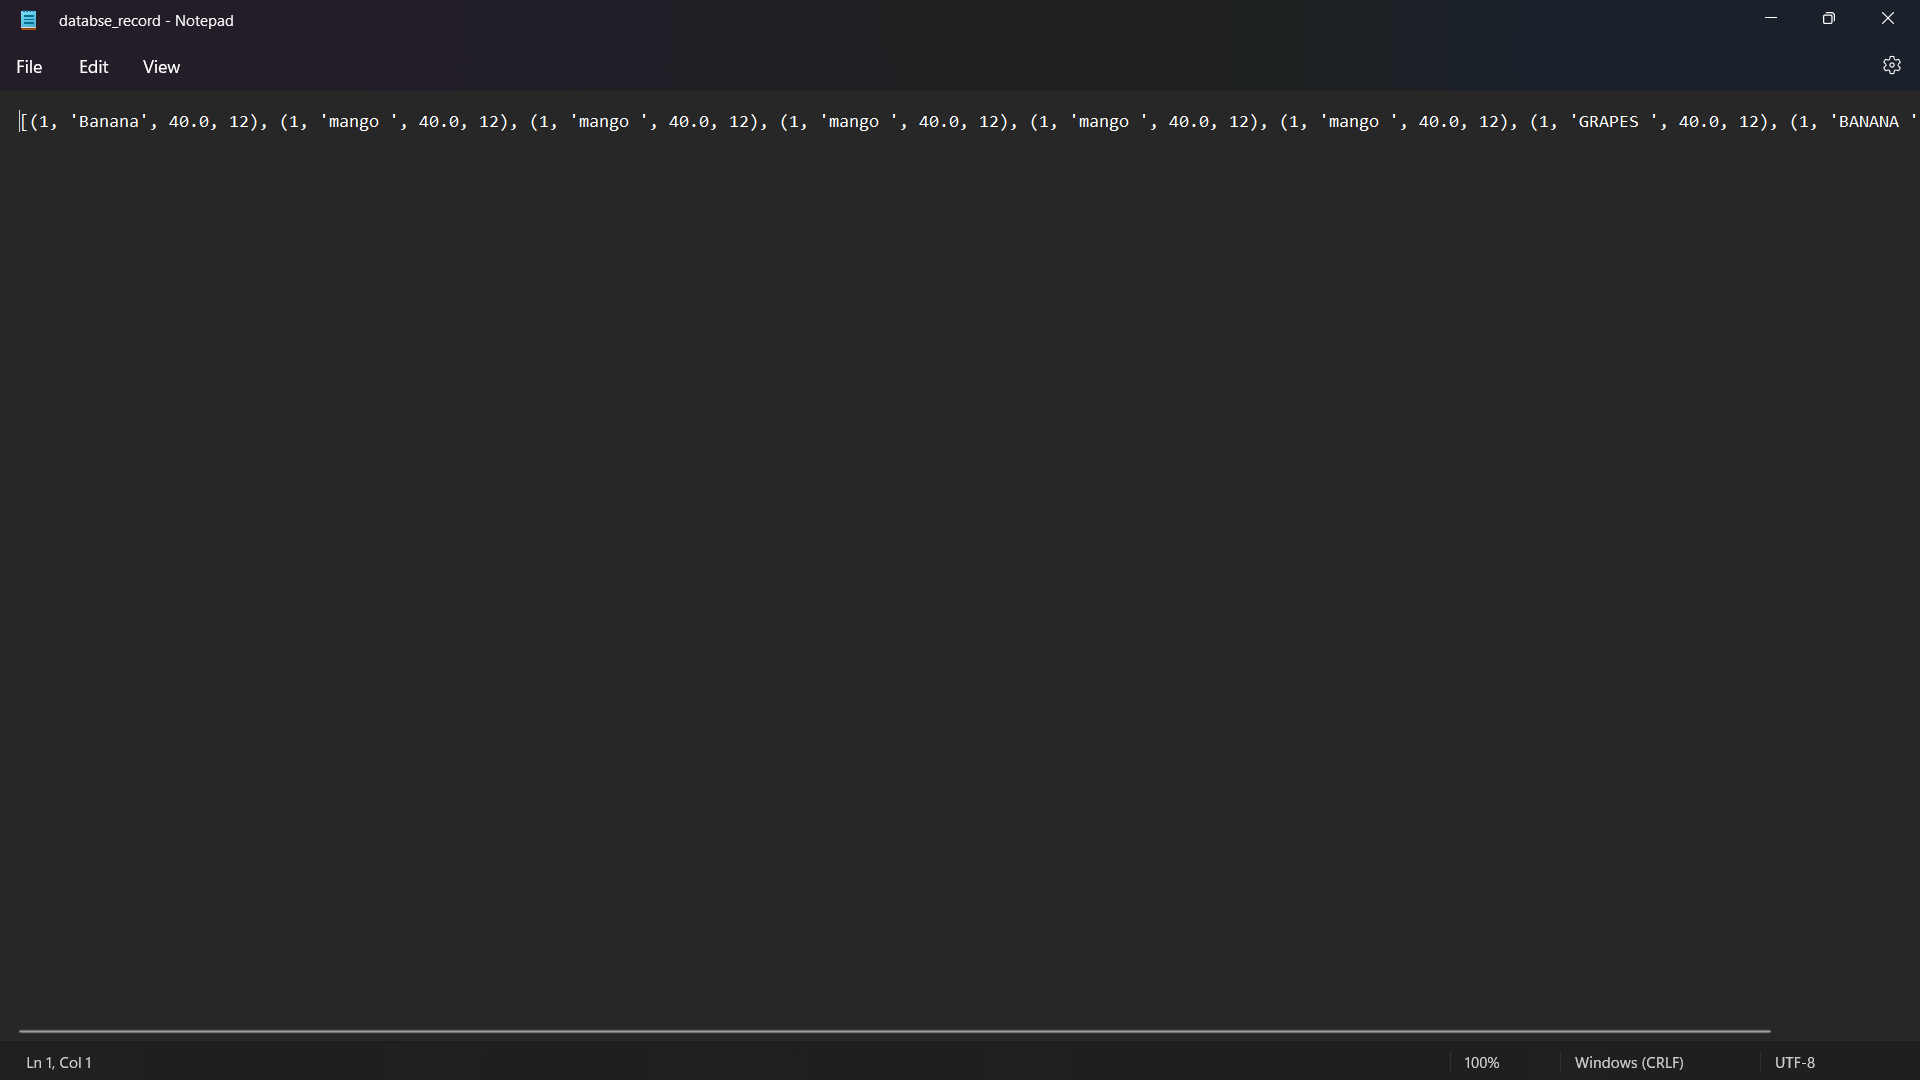

### postman:
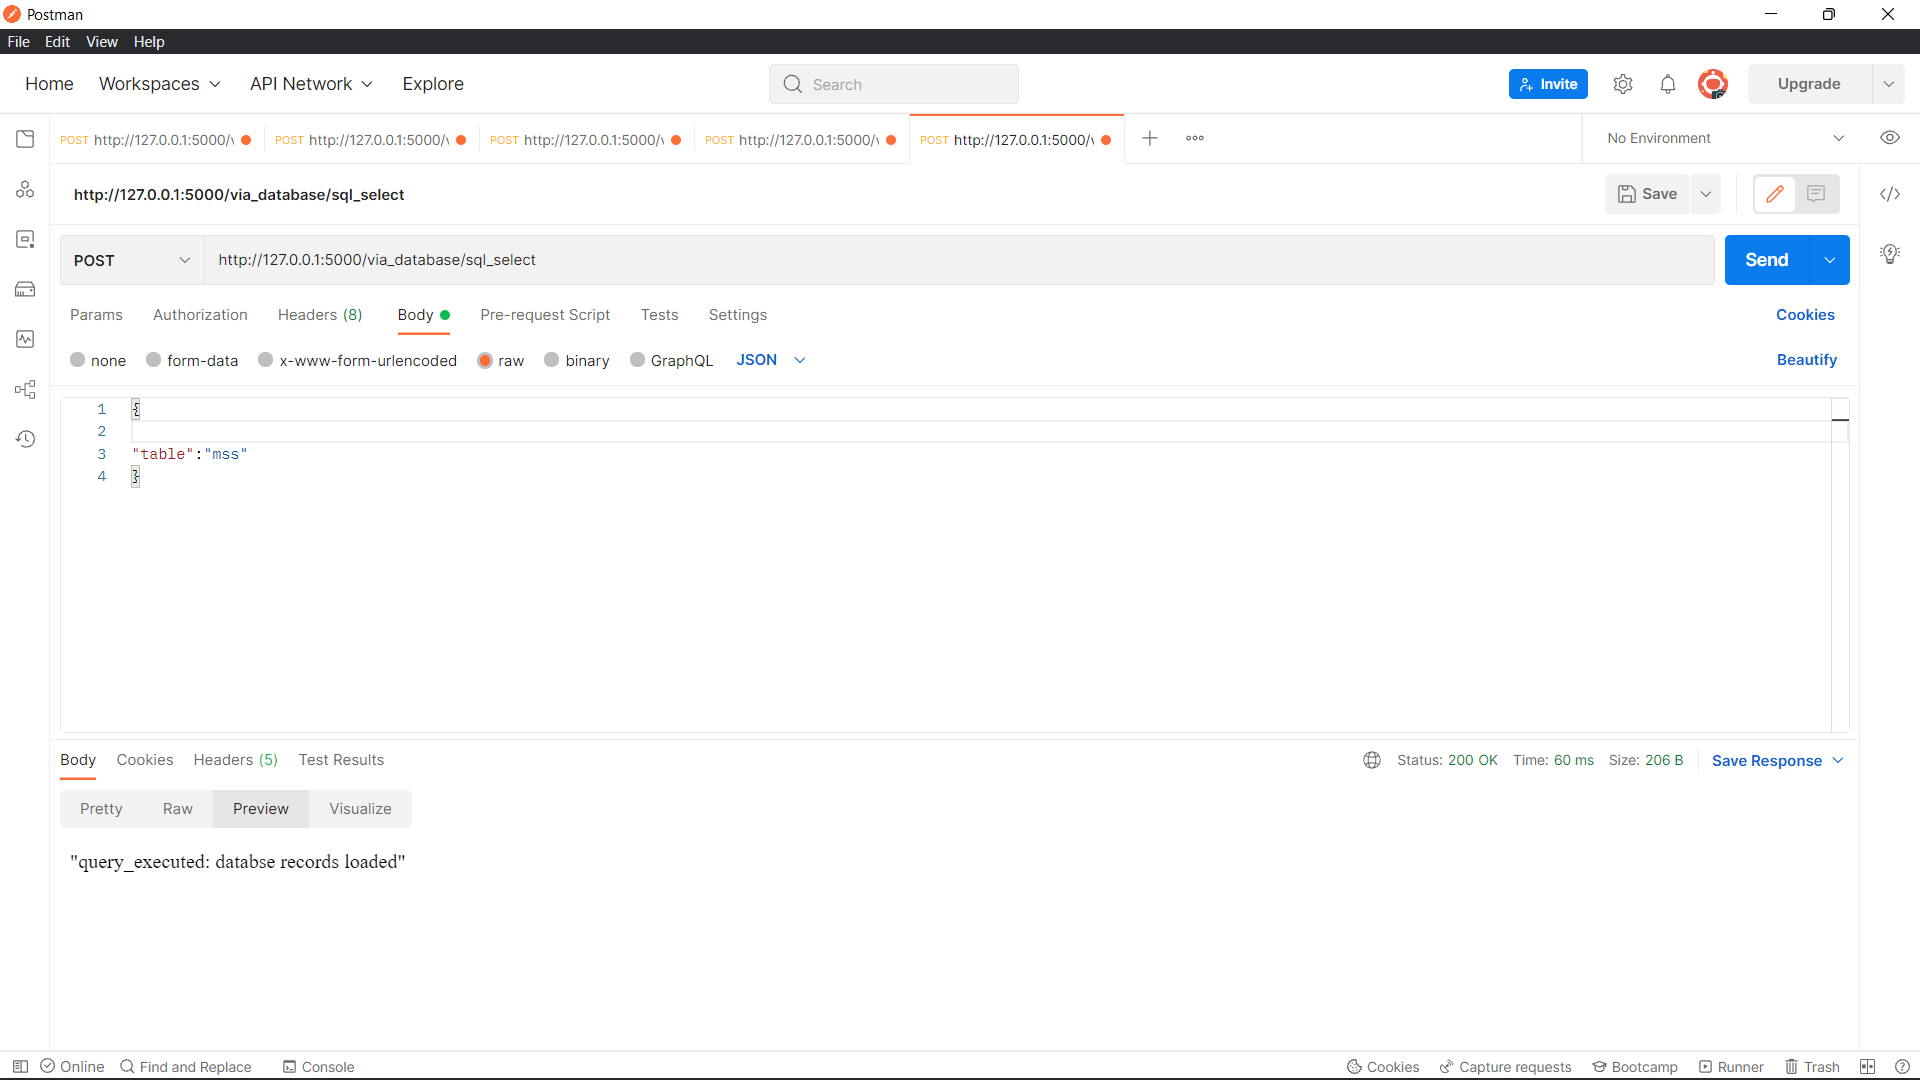

### last log entry:
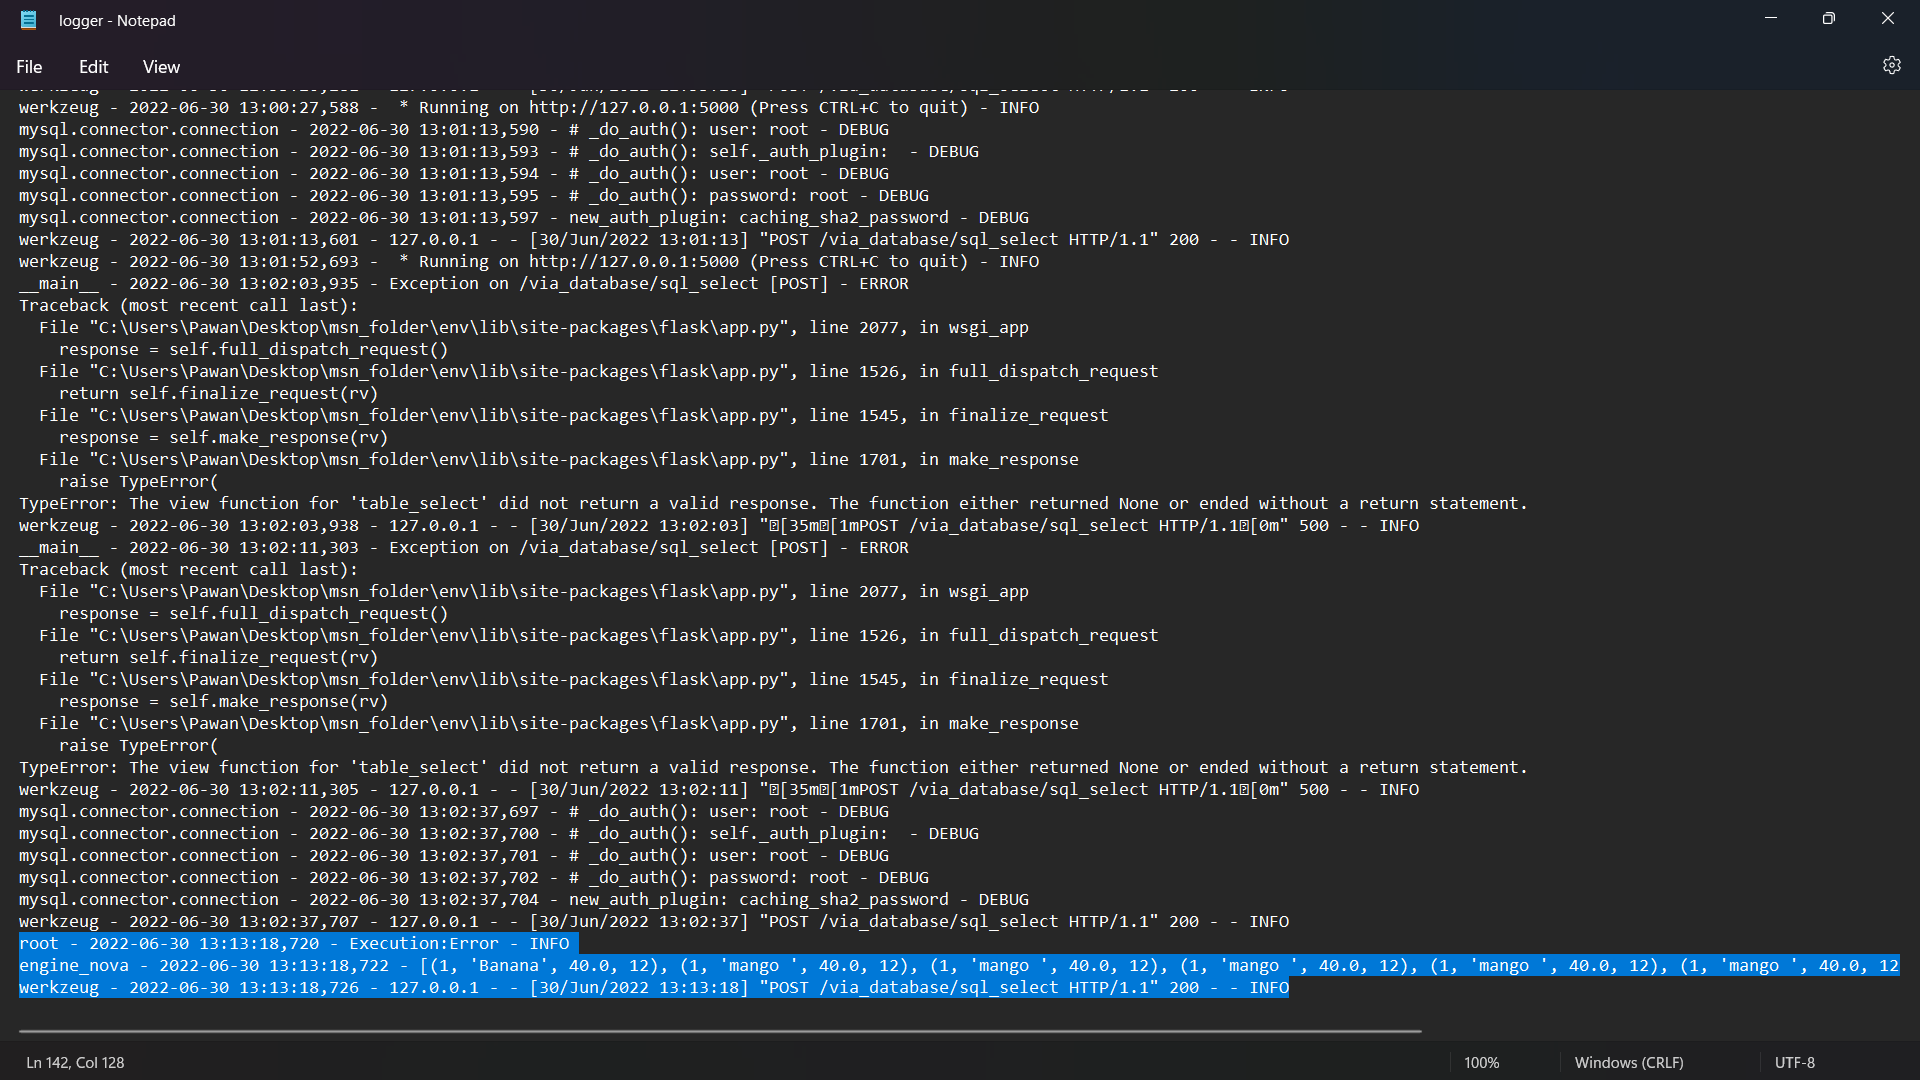



In [15]:
mydb=connection.connect(host='localhost',user='root',passwd='root',use_pure=True,database='Shop3')
cursor=mydb.cursor()
cursor.execute(f"select * from mss")
fetch=cursor.fetchall()
for row in fetch:
    print("Id: ", row[0])
    print("item: ", row[1])
    print("price: ", row[2])
    print("quantity: ", row[3]);
    print("\n");
    

mysql.connector.connection , 2022-06-30 13:25:17,152 , # _do_auth(): user: root ,DEBUG
mysql.connector.connection , 2022-06-30 13:25:17,152 , # _do_auth(): user: root ,DEBUG
mysql.connector.connection , 2022-06-30 13:25:17,154 , # _do_auth(): self._auth_plugin:  ,DEBUG
mysql.connector.connection , 2022-06-30 13:25:17,154 , # _do_auth(): self._auth_plugin:  ,DEBUG
mysql.connector.connection , 2022-06-30 13:25:17,155 , # _do_auth(): user: root ,DEBUG
mysql.connector.connection , 2022-06-30 13:25:17,155 , # _do_auth(): user: root ,DEBUG
mysql.connector.connection , 2022-06-30 13:25:17,156 , # _do_auth(): password: root ,DEBUG
mysql.connector.connection , 2022-06-30 13:25:17,156 , # _do_auth(): password: root ,DEBUG
mysql.connector.connection , 2022-06-30 13:25:17,158 , new_auth_plugin: caching_sha2_password ,DEBUG
mysql.connector.connection , 2022-06-30 13:25:17,158 , new_auth_plugin: caching_sha2_password ,DEBUG


Id:  1
item:  Banana
price:  40.0
quantity:  12


Id:  1
item:  mango 
price:  40.0
quantity:  12


Id:  1
item:  mango 
price:  40.0
quantity:  12


Id:  1
item:  mango 
price:  40.0
quantity:  12


Id:  1
item:  mango 
price:  40.0
quantity:  12


Id:  1
item:  mango 
price:  40.0
quantity:  12


Id:  1
item:  GRAPES 
price:  40.0
quantity:  12


Id:  1
item:  BANANA 
price:  40.0
quantity:  12


